In [1]:
%matplotlib inline
#%matplotlib notebook

import matplotlib as mp

import numpy as np

import scipy as sp

import scipy.linalg as spl

import scipy.signal as sps

import glob

import json

import urllib3

from datetime import datetime 

import dateutil.parser as dp

import matplotlib.pyplot as pl

import re

import obspy

from obspy.core import UTCDateTime

import geomagio

from geomagio.edge import EdgeFactory

#from geomagio.Algorithm import DeltaFAlgorithm

In [2]:
a = EdgeFactory()

In [3]:
brt = a.get_timeseries(channels=('H','E','Z'), observatory='BRT', type='variation', interval='second', starttime=UTCDateTime('2018-09-18T23:59:15Z'), endtime=UTCDateTime('2018-09-19T00:15:45Z'))

In [4]:
h = brt[0]

In [5]:
e = brt[1]

In [6]:
z = brt[2]

In [7]:
t = h.times()

### the equation is $x= 2$

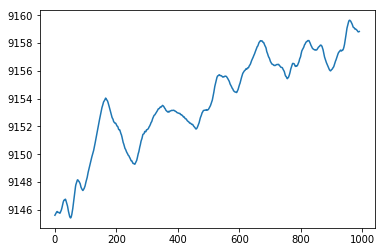

In [8]:
pl.plot(t,h.data)

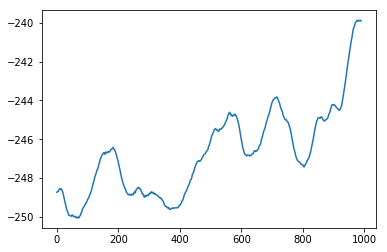

In [9]:
pl.plot(t,e.data)

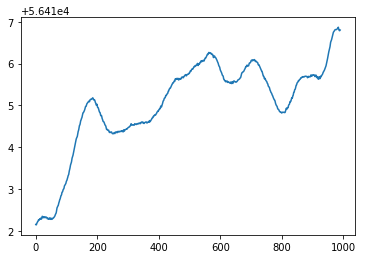

In [10]:
pl.plot(t,z.data)

In [11]:
one_minute_gauss_filter=sps.get_window(Nx=91,window=('gaussian', 15.8734))

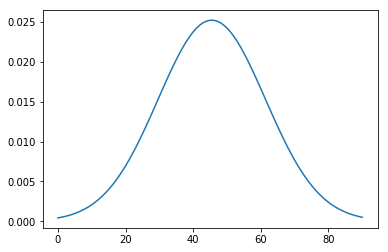

In [12]:
one_minute_gauss_filter=one_minute_gauss_filter/sum(one_minute_gauss_filter)
pl.plot(one_minute_gauss_filter)

In [13]:
t_filt = np.linspace(0,len(h.data)-91,901)

In [14]:
t_filt

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [15]:
t_filt.size

901

In [16]:
t.size

991

In [17]:
hf = np.ones_like(t_filt)
ef = np.ones_like(t_filt)
zf = np.ones_like(t_filt)

In [18]:
for i, t in t_filt:
    t = np.int(t)
    hf[i] = np.dot(one_minute_gauss_filter, h.data[np.int(i*60):np.int(i*60+91)])

TypeError: 'numpy.float64' object is not iterable

In [19]:
i_filt_s = t_filt
i_filt_e = t_filt + 90
i_filt_s

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

In [20]:
i_filt_e

array([ 90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,  99., 100.,
       101., 102., 103., 104., 105., 106., 107., 108., 109., 110., 111.,
       112., 113., 114., 115., 116., 117., 118., 119., 120., 121., 122.,
       123., 124., 125., 126., 127., 128., 129., 130., 131., 132., 133.,
       134., 135., 136., 137., 138., 139., 140., 141., 142., 143., 144.,
       145., 146., 147., 148., 149., 150., 151., 152., 153., 154., 155.,
       156., 157., 158., 159., 160., 161., 162., 163., 164., 165., 166.,
       167., 168., 169., 170., 171., 172., 173., 174., 175., 176., 177.,
       178., 179., 180., 181., 182., 183., 184., 185., 186., 187., 188.,
       189., 190., 191., 192., 193., 194., 195., 196., 197., 198., 199.,
       200., 201., 202., 203., 204., 205., 206., 207., 208., 209., 210.,
       211., 212., 213., 214., 215., 216., 217., 218., 219., 220., 221.,
       222., 223., 224., 225., 226., 227., 228., 229., 230., 231., 232.,
       233., 234., 235., 236., 237., 238., 239., 24

In [21]:
for i in len(hf):
    print(i)

TypeError: 'int' object is not iterable

In [22]:
from numpy.lib import stride_tricks as npls

In [23]:
window = 91
shape = h.data.shape[:-1] + (h.data.shape[-1] - window + 1, window)
strides = h.data.strides + (h.data.strides[-1],)
as_s = npls.as_strided(h.data, shape=shape, strides=strides, writeable=False)
as_s.shape

(901, 91)

In [24]:
shape

(901, 91)

In [25]:
strides

(8, 8)

In [26]:
as_s[::60]

array([[9145.616, 9145.659, 9145.698, ..., 9147.489, 9147.453, 9147.415],
       [9146.457, 9146.659, 9146.864, ..., 9152.84 , 9152.933, 9153.046],
       [9149.807, 9149.887, 9149.958, ..., 9151.775, 9151.762, 9151.772],
       ...,
       [9156.414, 9156.362, 9156.33 , ..., 9157.791, 9157.746, 9157.662],
       [9157.573, 9157.555, 9157.543, ..., 9157.463, 9157.493, 9157.475],
       [9156.089, 9156.107, 9156.129, ..., 9158.807, 9158.818, 9158.832]])

In [27]:
hf2 = np.dot(one_minute_gauss_filter, as_s[::].T)

In [28]:
hf2

array([9146.3294147 , 9146.34727413, 9146.36700672, 9146.38871274,
       9146.41245012, 9146.43826252, 9146.46617488, 9146.4961749 ,
       9146.52823637, 9146.5623157 , 9146.59832795, 9146.63614451,
       9146.6756066 , 9146.71654228, 9146.7587768 , 9146.8021385 ,
       9146.84643758, 9146.89145024, 9146.93693953, 9146.98268004,
       9147.0284517 , 9147.0740595 , 9147.11933223, 9147.16408598,
       9147.20814227, 9147.25135698, 9147.29362312, 9147.33486287,
       9147.37501995, 9147.41406655, 9147.45200071, 9147.48884501,
       9147.52464808, 9147.55946916, 9147.59339714, 9147.62656116,
       9147.65912327, 9147.69125836, 9147.72313398, 9147.75492814,
       9147.78682483, 9147.81901966, 9147.85172944, 9147.88516094,
       9147.91950993, 9147.95495996, 9147.9916889 , 9148.02987329,
       9148.06966334, 9148.11119517, 9148.15460282, 9148.20000821,
       9148.24750588, 9148.29716011, 9148.34902764, 9148.40314728,
       9148.45955299, 9148.5182719 , 9148.57929871, 9148.64261

In [29]:
hf2.shape

(901,)

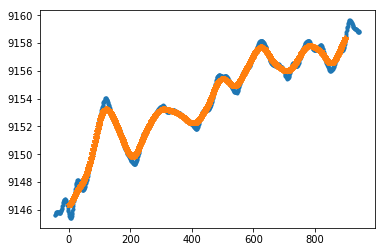

In [30]:
pl.plot(t-45,h.data,'.',t_filt,hf2,'*')

In [31]:
t_filt_dec = np.linspace(0,len(h.data)-91,16)

In [32]:
hf3 = np.dot(one_minute_gauss_filter, as_s[::60].T)

In [33]:
hf3

array([9146.3294147 , 9148.70819126, 9153.2441662 , 9150.7324949 ,
       9151.04734904, 9153.19756752, 9152.87407819, 9152.39041223,
       9154.92828897, 9154.92281761, 9157.04724769, 9156.78471925,
       9156.09298106, 9157.78661802, 9156.74486717, 9158.39531688])

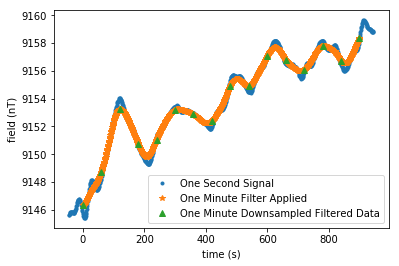

In [34]:
pl.plot(t-45,h.data,'.',t_filt,hf2,'*',t_filt_dec,hf3,'^')
pl.xlabel('time (s)')
pl.ylabel('field (nT)')
pl.legend(['One Second Signal', 'One Minute Filter Applied', 
           'One Minute Downsampled Filtered Data'])
pl.show()

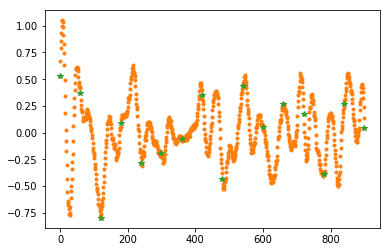

In [35]:
pl.plot(t_filt, hf2 - h.data[45:-45], '.C1', 
        t_filt_dec, hf3 - h.data[45:-45:60], '*C2')

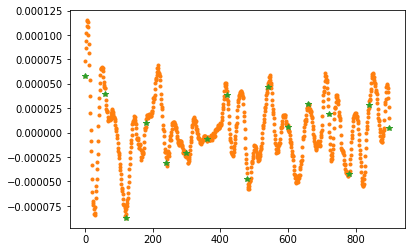

In [36]:
pl.plot(t_filt, (hf2 - h.data[45:-45])/h.data[45:-45], '.C1', 
        t_filt_dec, (hf3 - h.data[45:-45:60])/h.data[45:-45:60], '*C2')

In [37]:
h.data

array([9145.616, 9145.659, 9145.698, 9145.744, 9145.789, 9145.829,
       9145.863, 9145.881, 9145.88 , 9145.848, 9145.812, 9145.814,
       9145.823, 9145.821, 9145.808, 9145.777, 9145.76 , 9145.785,
       9145.835, 9145.89 , 9145.942, 9146.   , 9146.074, 9146.166,
       9146.27 , 9146.382, 9146.484, 9146.561, 9146.628, 9146.685,
       9146.709, 9146.706, 9146.721, 9146.756, 9146.77 , 9146.736,
       9146.663, 9146.589, 9146.525, 9146.464, 9146.384, 9146.274,
       9146.137, 9145.999, 9145.899, 9145.801, 9145.674, 9145.576,
       9145.527, 9145.479, 9145.436, 9145.424, 9145.444, 9145.496,
       9145.575, 9145.682, 9145.805, 9145.934, 9146.087, 9146.268,
       9146.457, 9146.659, 9146.864, 9147.02 , 9147.159, 9147.332,
       9147.512, 9147.68 , 9147.803, 9147.869, 9147.934, 9148.013,
       9148.097, 9148.151, 9148.164, 9148.146, 9148.101, 9148.072,
       9148.058, 9148.024, 9147.969, 9147.932, 9147.893, 9147.798,
       9147.695, 9147.625, 9147.575, 9147.532, 9147.489, 9147.

In [38]:
np.dot(h.data[-151:-60], one_minute_gauss_filter)

9156.74486717354

In [39]:
as_s.nbytes

655928

In [40]:
h.data.nbytes

7928

In [41]:
655928/7928

82.73562058526741

In [42]:
24*4*655928

62969088

In [43]:
24*4*31*655928

1952041728

In [44]:
86400*15

1296000

In [45]:
h_end_nan = h.data[-91:]

In [46]:
h_end_nan

array([9156.089, 9156.107, 9156.129, 9156.162, 9156.21 , 9156.246,
       9156.264, 9156.307, 9156.378, 9156.446, 9156.524, 9156.605,
       9156.673, 9156.726, 9156.769, 9156.839, 9156.92 , 9156.983,
       9157.059, 9157.14 , 9157.195, 9157.237, 9157.292, 9157.336,
       9157.352, 9157.378, 9157.406, 9157.424, 9157.463, 9157.493,
       9157.475, 9157.436, 9157.43 , 9157.463, 9157.484, 9157.472,
       9157.485, 9157.524, 9157.561, 9157.625, 9157.707, 9157.799,
       9157.91 , 9158.047, 9158.206, 9158.35 , 9158.476, 9158.619,
       9158.786, 9158.949, 9159.072, 9159.163, 9159.255, 9159.347,
       9159.431, 9159.51 , 9159.58 , 9159.62 , 9159.638, 9159.641,
       9159.616, 9159.595, 9159.579, 9159.537, 9159.488, 9159.45 ,
       9159.408, 9159.352, 9159.283, 9159.21 , 9159.156, 9159.128,
       9159.119, 9159.105, 9159.078, 9159.038, 9159.007, 9159.01 ,
       9159.012, 9158.995, 9158.979, 9158.956, 9158.933, 9158.908,
       9158.871, 9158.835, 9158.812, 9158.804, 9158.807, 9158.

In [47]:
h_end_nan[5] = np.nan
#h_end_nan
h_end_nan = np.vstack([h.data[-182:-91], h_end_nan])

In [48]:
np.dot(h_end_nan, one_minute_gauss_filter)

array([9157.58185583,           nan])

In [49]:
# build masked array for invalid entries
as_masked = np.ma.masked_invalid(h_end_nan, copy=True)
as_weight_sums =  np.dot(one_minute_gauss_filter, (~as_masked.mask).T)
as_invalid_sums = np.sum(as_masked.mask)
            
as_invalid_masked = np.ma.masked_greater(as_invalid_sums, 
                                         np.floor(
                                            0.1*91))

In [50]:
as_invalid_masked

masked_array(data=1,
             mask=False,
       fill_value=999999)

In [51]:
as_invalid_sums

1

In [52]:
filtered = np.ma.dot(one_minute_gauss_filter, as_masked.T)
filtered = np.divide(filtered, as_weight_sums)
filtered.mask = as_invalid_masked.mask
filtered_out = np.ma.filled(filtered, np.nan)
filtered_out
#filtered

array([9157.58185583, 9158.39741188])

In [53]:
g = np.ma.masked_invalid(h_end_nan, copy=True)
v = np.sum(g.mask, axis=0)
v

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [54]:
91*0.9

81.9

In [55]:
np.sign(-100)

-1

In [56]:
np.sign(100)

1

In [57]:
np.sign(0)

0

In [58]:
b = EdgeFactory(cwbhost='166.154.45.158', host='166.154.45.158')

In [59]:
gxx_golden = b.get_timeseries(observatory='GXX', 
                              channels=['LFF'], 
                              type='variation', 
                              interval='second', 
                              starttime=UTCDateTime('2018-09-13T00:00:00Z'), 
                              endtime=UTCDateTime('2018-09-13T00:15:00Z'))

In [60]:
UTCDateTime('2018-09-18T23:59:15Z')+45

2018-09-19T00:00:00.000000Z

In [61]:
gxx_golden[0].stats.data_interval

'second'

In [62]:
fg = gxx_golden[0].data

In [63]:
fg.shape

(901,)

In [64]:
gxx_golden_v = b.get_timeseries(observatory='GXX', 
                                channels=['BEU'], 
                                type='variation',
                                interval='second',
                                starttime=UTCDateTime('2018-09-13T00:00:00Z')-9.9,
                                endtime=UTCDateTime('2018-09-13T00:15:00Z')+9.9)

In [65]:
hg = gxx_golden_v[0].data

In [66]:
hg.shape

(9199,)

In [67]:
tg = gxx_golden_v[0].times()

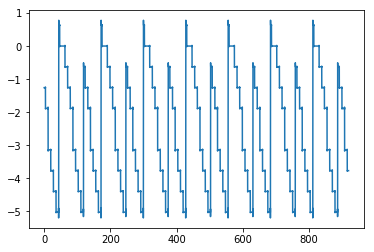

In [68]:
pl.plot(tg,hg)

In [69]:
gxx_golden_v[0].stats.data_interval

'second'

In [70]:
# excerpted from https://github.com/scipy/scipy/issues/7725#issuecomment-322094749
sample_rate = 10.0
cutoff = 0.2
width = 0.3
stop_db = 50.0
stop_db = np.abs(stop_db)

# Convert to normalized frequencies
nyq = 0.5*sample_rate
cutoff = cutoff / nyq
width = width / nyq

numtaps, beta = sps.kaiserord(ripple=stop_db, width=width)
numtaps |= 1
taps = sps.firwin(numtaps, cutoff, window=('kaiser', beta), scale=False)

In [71]:
taps

array([-4.52198796e-05, -1.11619355e-04, -2.01483397e-04, -3.16506684e-04,
       -4.57626335e-04, -6.24859943e-04, -8.17155093e-04, -1.03225668e-03,
       -1.26659826e-03, -1.51522326e-03, -1.77174156e-03, -2.02832596e-03,
       -2.27575221e-03, -2.50348516e-03, -2.69981225e-03, -2.85202413e-03,
       -2.94664077e-03, -2.96967983e-03, -2.90696256e-03, -2.74445127e-03,
       -2.46861053e-03, -2.06678395e-03, -1.52757659e-03, -8.41232992e-04,
        8.97254861e-19,  1.00153625e-03,  2.16614984e-03,  3.49372106e-03,
        4.98103797e-03,  6.62166161e-03,  8.40586129e-03,  1.03206248e-02,
        1.23497468e-02,  1.44739951e-02,  1.66713562e-02,  1.89173528e-02,
        2.11854322e-02,  2.34474143e-02,  2.56739920e-02,  2.78352727e-02,
        2.99013480e-02,  3.18428788e-02,  3.36316814e-02,  3.52413005e-02,
        3.66475558e-02,  3.78290461e-02,  3.87676015e-02,  3.94486690e-02,
        3.98616244e-02,  4.00000000e-02,  3.98616244e-02,  3.94486690e-02,
        3.87676015e-02,  

In [72]:
taps.shape

(99,)

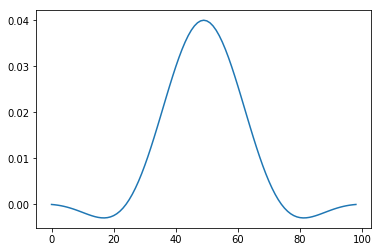

In [73]:
pl.plot(taps)

In [74]:
one_second_filter = taps/np.sum(taps)

In [75]:
window = 99
shape = hg.shape[:-1] + (hg.shape[-1] - window + 1, window)
strides = hg.strides + (hg.strides[-1],)
as_s = npls.as_strided(hg, shape=shape, strides=strides, writeable=False)
as_s.shape

(9101, 99)

In [76]:
t_filt_g = np.linspace(0,(len(hg)-99)/10,9101)

In [77]:
t_filt_g

array([0.000e+00, 1.000e-01, 2.000e-01, ..., 9.098e+02, 9.099e+02,
       9.100e+02])

In [78]:
hg2 = np.dot(one_second_filter, as_s.T)

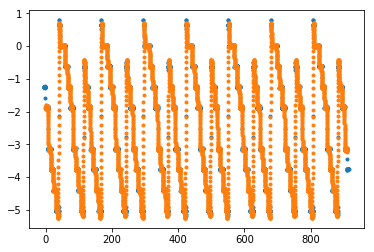

In [79]:
pl.plot(tg-4.9,hg,'.',t_filt_g,hg2,'.')
pl.show()

In [80]:
hg.shape

(9199,)

In [81]:
g = EdgeFactory(host='mage1.cr.usgs.gov')

In [82]:
gxx_gol2 = g.get_timeseries(observatory='GXX',
                            channels=['BEU'], 
                            type='variation',
                            interval='second',
                            starttime=UTCDateTime('2018-09-18T00:00:00Z'),
                            endtime=UTCDateTime('2018-09-18T00:15:00Z'))

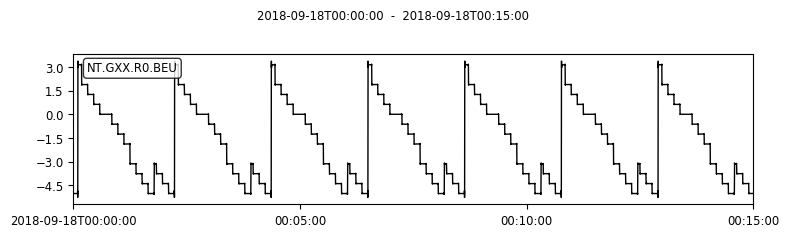

In [83]:
gxx_gol2.plot()

In [84]:
gb = np.ones_like(one_minute_gauss_filter)

In [85]:
len(gb)

91

In [86]:
for i in np.linspace(-45, 45, 91):
    gb[np.int(i) + 45] = i/(15.8734**2)*np.exp(-1/2*(i/15.8734)**2)

In [87]:
gb = gb/np.sum(gb)

In [88]:
gb

array([ 9.25626065e+14,  1.07988457e+15,  1.25421237e+15,  1.45012769e+15,
        1.66905833e+15,  1.91229425e+15,  2.18093527e+15,  2.47583428e+15,
        2.79753724e+15,  3.14622080e+15,  3.52162944e+15,  3.92301357e+15,
        4.34907087e+15,  4.79789283e+15,  5.26691909e+15,  5.75290185e+15,
        6.25188287e+15,  6.75918542e+15,  7.26942326e+15,  7.77652856e+15,
        8.27380026e+15,  8.75397363e+15,  9.20931155e+15,  9.63171706e+15,
        1.00128660e+16,  1.03443582e+16,  1.06178837e+16,  1.08254024e+16,
        1.09593303e+16,  1.10127301e+16,  1.09794999e+16,  1.08545541e+16,
        1.06339920e+16,  1.03152466e+16,  9.89721067e+15,  9.38033307e+15,
        8.76668227e+15,  8.05997344e+15,  7.26555675e+15,  6.39036572e+15,
        5.44282587e+15,  4.43272479e+15,  3.37104649e+15,  2.26977371e+15,
        1.14166323e+15, -0.00000000e+00, -1.14166323e+15, -2.26977371e+15,
       -3.37104649e+15, -4.43272479e+15, -5.44282587e+15, -6.39036572e+15,
       -7.26555675e+15, -

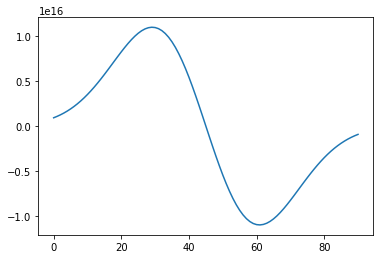

In [89]:
pl.plot(gb)

In [90]:
np.linspace(-45,45,91)

array([-45., -44., -43., -42., -41., -40., -39., -38., -37., -36., -35.,
       -34., -33., -32., -31., -30., -29., -28., -27., -26., -25., -24.,
       -23., -22., -21., -20., -19., -18., -17., -16., -15., -14., -13.,
       -12., -11., -10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,
        -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,
        10.,  11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,
        21.,  22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,
        32.,  33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,
        43.,  44.,  45.])

In [91]:
hfdiff = np.dot(gb, as_s[::60].T)

ValueError: shapes (91,) and (99,152) not aligned: 91 (dim 0) != 99 (dim 0)

In [92]:
pl.plot(t_filt_dec,hfdiff,':')
pl.xlabel('time (s)')
pl.ylabel('field (nT)')
pl.show()

NameError: name 'hfdiff' is not defined

In [93]:
gt = 16037.0
gt3 = 37

In [94]:
if (gt3 < 60 - 45):
    st3 = gt + 60 - 45
else:
    st3 = gt - gt3 - 45
st3

15955.0

In [95]:
(15955 + 45) % 60

40